# Introduction to Python and Natural Language Technologies

__Laboratory 05, Data science, Handling text data, Pandas__

__March 11, 2021__

__Judit Ács, Ádám Kovács__


In [1]:
import pandas as pd  # by convention we use the pd alias
%matplotlib inline
import matplotlib
import numpy as np

# make our charts pretier
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

We are going to work with the MovieLens dataset. First, we need to download it. http://grouplens.org/datasets/movielens/

Download the file only if it wasn't before.

In [2]:
import os

data_dir = os.getenv("MOVIELENS")
if data_dir is None:
    data_dir = ""

ml_path = os.path.join(data_dir, "ml.zip")

if not os.path.exists(ml_path):
    print("Download data")
    import urllib
    u = urllib.request.URLopener()
    u.retrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", ml_path)
    print("Data downloaded")

In [3]:
unzip_path = os.path.join(data_dir, "ml-100k")

if not os.path.exists(unzip_path):
    print("Extracting data")
    from zipfile import ZipFile
    with ZipFile(ml_path) as myzip:
        myzip.extractall(data_dir)
    print("Data extraction done")
        
data_dir = unzip_path

## Importing and preprocessing the data

In [4]:
column_names = [
    "movie_id", "title", "release_date", "video_release_date", "imdb_url", "unknown", "action", "adventure", "animation",
    "children", "comedy", "crime", "documentary", "drama", "fantasy", "film_noir", "horror", "musical", "mystery",
    "romance", "sci_fi", "thriller", "war", "western"]

df = pd.read_table(
    os.path.join(data_dir, "u.item"), sep="|",
    names=column_names, encoding="latin1", index_col='movie_id')
df.head()

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


We have two columns representing dates: release_date, video_release_date. Pandas can parse dates in multiple ways, we only need to give the columns in the parse_dates parameter. Note that null values changed from Nan (not a number) to NaT (not a time).

In [5]:
df = pd.read_table(os.path.join(data_dir, "u.item"), sep="|",
                   names=column_names, encoding="latin1",
                   parse_dates=[2,3], index_col='movie_id')
df.head()
df.loc[100:150,:]

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
100,Fargo (1996),1997-02-14,NaT,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
101,Heavy Metal (1981),1981-03-08,NaT,http://us.imdb.com/M/title-exact?Heavy%20Metal...,0,1,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
102,"Aristocats, The (1970)",1970-01-01,NaT,"http://us.imdb.com/M/title-exact?Aristocats,%2...",0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
103,All Dogs Go to Heaven 2 (1996),1996-03-29,NaT,http://us.imdb.com/M/title-exact?All%20Dogs%20...,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
104,Theodore Rex (1995),1996-03-29,NaT,http://us.imdb.com/M/title-exact?Theodore%20Re...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
105,Sgt. Bilko (1996),1996-03-29,NaT,http://us.imdb.com/M/title-exact?Sgt.%20Bilko%...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
106,Diabolique (1996),1996-01-01,NaT,http://us.imdb.com/M/title-exact?Diabolique%20...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
107,Moll Flanders (1996),1996-06-14,NaT,http://us.imdb.com/M/title-exact?Moll%20Flande...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,Kids in the Hall: Brain Candy (1996),1996-04-12,NaT,http://us.imdb.com/M/title-exact?Kids%20in%20t...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Our solution is still not perfect, because after the title of the movies, the date is present in parentheses. We need to get rid of them, because this information is redundant and generates noise in the DataFrame.

Regular expressions can be used to delete the date between the parentheses. After we delete the remaining whitespaces as well (the strip function deletes the whitespaces in the beginning and in the end of the string as well). Finally we can use our new stripped title instead of the old one.

In [6]:
df.title = df.title.str.replace(r'\(.*\)', '').str.strip()

In [7]:
df.title

movie_id
1             Toy Story
2             GoldenEye
3            Four Rooms
4            Get Shorty
5               Copycat
             ...       
1678         Mat' i syn
1679          B. Monkey
1680      Sliding Doors
1681       You So Crazy
1682    Scream of Stone
Name: title, Length: 1682, dtype: object

The video_release_date attribute contains invalid information in the first fields. We need to check that it contains valid information before using it. We can list those fields where the video_release value is not NaT (not invalid value).

In [8]:
df[df.video_release_date.notnull()]

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,


In [9]:
#df = df.drop('video_release_date', axis=1)
df.loc[1:2,:]

,title,release_date,video_release_date,imdb_url,unknown,action,adventure,animation,children,comedy,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
movie_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995-01-01,NaT,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye,1995-01-01,NaT,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df = df.drop('unknown', axis=1)
df['year'] = df.release_date.dt.year
df
'''
after running: (first run)
df = df.drop('unknown', axis=1)
df['year'] = df.release_date.dt.year

then we run again: (second run)
df = df.drop('unknown', axis=1)
df['year'] = df.release_date.dt.year
df
There will be errors for the line 'df = df.drop('unknown', axis=1)' at the second run,
because it tries to drop the 'unknow' column again while it has dropped this column at the first run.

'''

"\nafter running: (first run)\ndf = df.drop('unknown', axis=1)\ndf['year'] = df.release_date.dt.year\n\nthen we run again: (second run)\ndf = df.drop('unknown', axis=1)\ndf['year'] = df.release_date.dt.year\ndf\nThere will be errors for the line 'df = df.drop('unknown', axis=1)' at the second run,\nbecause it tries to drop the 'unknow' column again while it has dropped this column at the first run.\n\n"

# 1. Simple queries

## 1.1. How many action movies were released before 1985? How many were released in 1985 or after 1985?

In [11]:
def count_movies_before_1985(df):
    return len(df[df.year<1985])
    
def count_movies_after_1984(df):
    return len(df[df.year>=1985])

In [12]:
before = count_movies_before_1985(df)
print(before)
assert type(before) == int

after = count_movies_after_1984(df)
print(after)
assert type(after) == int

272
1409


## 1.2. Is there a thriller movie for children? Search for an example and retrieve the title of the movie.

In [13]:
def child_thriller(df):
    child_thriller = df[(df.children==True) & (df.thriller ==True) ]
    if len(child_thriller) > 0: # there are thriller movies for children
        return child_thriller.iloc[0, 0] # first row; first column ('title' column); iloc: index location?
                                         # child_thriller.loc[0, 0] : RETURN ERROR ???
                                    


#df.iloc[0,0]

In [14]:
title = child_thriller(df)
assert type(title) == str

## 1.3. How many movies have longer title than 30 character?

In [15]:
'''
# Remove spaces in a string
t="lan hello"
len("lan hello")
s=t.replace(" " , "")
s.len()
'''


'''
# Counting characters in the titles in a DataFrame
t=df.iloc[:,[0]] # create a DataFrame object containing only 'title' column
t["remove_space"]=t.title.apply(lambda x : x.replace(" ",""))
t["length_title"]=t.remove_space.apply(lambda x: len(x))
t
'''
def long_titles(df):
    titles= df[['title']]
    titles["remove_space"]=titles.title.apply(lambda x : x.replace(" ",""))
    titles["length_title"]=titles.remove_space.apply(lambda x: len(x))
    return len(titles[titles.length_title > 30])

print(long_titles(df))



40


<ipython-input-15-41b25efe00a8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles["remove_space"]=titles.title.apply(lambda x : x.replace(" ",""))
<ipython-input-15-41b25efe00a8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles["length_title"]=titles.remove_space.apply(lambda x: len(x))


In [16]:
title_cnt = long_titles(df)
assert type(title_cnt) == int

<ipython-input-15-41b25efe00a8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles["remove_space"]=titles.title.apply(lambda x : x.replace(" ",""))
<ipython-input-15-41b25efe00a8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles["length_title"]=titles.remove_space.apply(lambda x: len(x))


# Task 2: grouping and visualization

## 2.1. Group the comedies by year. Visualize how many comedies were relesead annually in a bar chart.

In [17]:
def comedy_by_year(df):
    comedies=df[df.comedy == True] # Sort out comedy movies only
    return_value= comedies.groupby('year')
    #print(type(return_value))
    comedies.groupby('year').size().plot(kind='bar') # plot the data as requested
    return return_value
#comedies=df[df.comedy == True]
#comedies

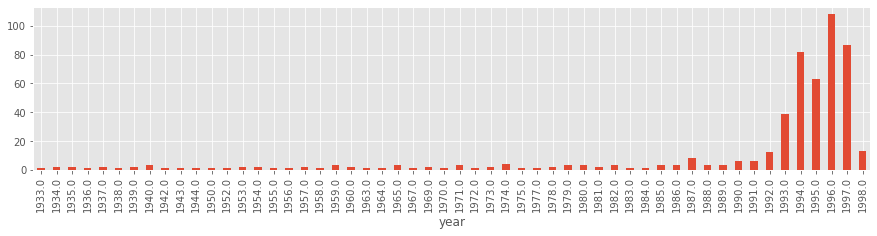

In [18]:
c = comedy_by_year(df)
assert type(c) == pd.core.groupby.DataFrameGroupBy

## 2.2. Visualize the distribution of the release days (days of the month) in a pie chart! 

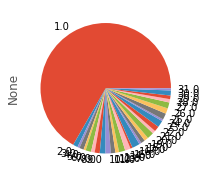

In [19]:
def groupby_release_day(df):
    return_value= df.groupby(df.release_date.dt.day)
    df.groupby(df.release_date.dt.day).size().plot(kind='pie')
    return return_value
#df.release_date.dt.day
groupby_release_day(df)

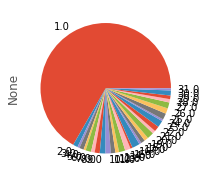

In [20]:
by_day = groupby_release_day(df)
assert type(by_day) == pd.core.groupby.DataFrameGroupBy

# a month is 32 days at most
assert len(by_day) < 32

# don't group by the weekdays
assert len(by_day) > 7

## 2.3. We want to make a traditional lexicon from the movies. Count the starting letters in the titles of the movies. Visualize it in a pie chart.

### Group the movies by the starting letters.

In [21]:
def groupby_initial_letter(df):
    titles=df[['title']]
    titles['start_letter']= titles.title.apply(lambda x: x[0])
    return_value=titles.groupby('start_letter')
    # visusalise the data:
    return_value.size().plot(kind='pie')
    return return_value

titles=df[['title']]
titles['start_letter']= titles.title.apply(lambda x: x[0])
titles

<ipython-input-21-b7a2432d8109>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['start_letter']= titles.title.apply(lambda x: x[0])


,title,start_letter
movie_id,,
1,Toy Story,T
2,GoldenEye,G
3,Four Rooms,F
4,Get Shorty,G
5,Copycat,C
...,...,...
1678,Mat' i syn,M
1679,B. Monkey,B
1680,Sliding Doors,S


<ipython-input-21-b7a2432d8109>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles['start_letter']= titles.title.apply(lambda x: x[0])


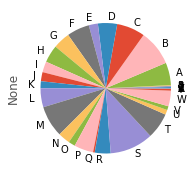

In [22]:
initial = groupby_initial_letter(df)

assert type(initial) == pd.core.groupby.DataFrameGroupBy

# Handling multiple dataframes, e.g.merge

In [23]:
cols = ['user', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(os.path.join(data_dir, "u.data"), names=cols)

In [24]:
ratings['timestamp'] = pd.to_datetime(ratings.timestamp, unit='s')
ratings.head()

,user,movie_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [25]:
movies = df

In [26]:
ratings = pd.merge(ratings, movies, left_on='movie_id', right_index=True)
ratings.head()
ratings

,user,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,action,adventure,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
0,196,242,3,1997-12-04 15:55:49,Kolya,1997-01-24,NaT,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,1997.0
253,63,242,3,1997-10-01 23:06:30,Kolya,1997-01-24,NaT,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,1997.0
629,226,242,5,1998-01-04 04:37:51,Kolya,1997-01-24,NaT,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,1997.0
1232,154,242,3,1997-11-10 05:03:55,Kolya,1997-01-24,NaT,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,1997.0
2159,306,242,5,1997-10-10 17:16:33,Kolya,1997-01-24,NaT,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96444,840,1674,4,1998-03-29 22:48:02,Mamma Roma,1962-01-01,NaT,http://us.imdb.com/M/title-exact?Mamma%20Roma%...,0,0,...,0,0,0,0,0,0,0,0,0,1962.0
97649,655,1640,3,1998-02-26 06:30:46,"Eighth Day, The",1996-11-01,NaT,"http://us.imdb.com/Title?Huiti%E8me+jour,+Le+(...",0,0,...,0,0,0,0,0,0,0,0,0,1996.0
98427,655,1637,3,1998-03-04 04:04:15,Girls Town,1996-08-23,NaT,http://us.imdb.com/M/title-exact?Girls%20Town%...,0,0,...,0,0,0,0,0,0,0,0,0,1996.0
98640,655,1630,3,1998-02-14 03:58:55,"Silence of the Palace, The",1996-02-02,NaT,http://us.imdb.com/M/title-exact?Saimt%20el%20...,0,0,...,0,0,0,0,0,0,0,0,0,1996.0


# Task 3: merge

## Q3.1. How many movies got a rating greater than 4 atleast once?

WARNING! The title of a movie is not necessarily unique!

In [27]:
def count_greater_than_4(ratings):
    movies_4_stars_at_least= ratings[ratings.rating >= 4]
    return len(movies_4_stars_at_least[['title']].drop_duplicates())
#movies_4_stars_at_least= ratings[ratings.rating >= 4]
#r=len(movies_4_stars_at_least[['title']].drop_duplicates())#.reset_index(drop=True))
#r

In [28]:
greater = count_greater_than_4(ratings)

assert type(greater) == int
assert greater != 1160  # titles are NOT UNIQUE

## Q3.2. All of the ratings contain a timestamp. What is the average of the ratings by the weekdays?
What are the days when the people are kinder?

Hint: look at the `dt` namespace (dt.weekday).

In [29]:
def rating_mean_by_weekday(ratings):
    #print("Hello")
    weekdays_rating_mean= ratings.groupby(ratings.timestamp.dt.weekday).mean()
    return weekdays_rating_mean.rating
#weekdays= ratings.groupby(ratings.timestamp.dt.weekday).mean()
#weekdays.rating

In [30]:
weekday_mean = rating_mean_by_weekday(ratings)

assert type(weekday_mean) == pd.Series
assert type(weekday_mean) != pd.DataFrame  # only one column is needed

# ===================== PASSING LEVEL ======================

## \*2. Write function, that groups by multiple columns and returns the biggest group.

Hint: the `GroupBy` object's `get_group` function returns a group.

In [31]:
'''   
### EXAMINATION of 
g=df.groupby( ["drama", "comedy"]) # return DataFrameGroupBy
gz=g.count() # retun DataFrame with the group names as its indexes, and other columns
             # containing in itself the size of the group.
gz.head() # to examine the structure of DataFrame gz
gz.title.idxmax() # base on the examination in gz.head()
t=g.get_group(gz.title.idxmax())
t["drama"]
'''
def get_largest_group(df, groupby_columns):
    # because movies are grouped by genres.
    # For example, for a genre "drama"
    # there are only two groups: group has this genre with value 0, the other with value 1
    groups=df.groupby(groupby_columns) 
    group_size=groups.count()
    return groups.get_group(group_size.title.idxmax())
    #return biggest

    #raise NotImplementedError()

In [32]:
genres = ["drama"]
drama_largest = get_largest_group(df, genres)

assert type(drama_largest) == pd.DataFrame
assert len(drama_largest) == 957

genres = ["drama", "comedy"]
both_largest = get_largest_group(df, genres)

# the labels are the same in the comedies and dramas
assert both_largest[["comedy", "drama"]].nunique().loc["comedy"] == 1
assert both_largest[["comedy", "drama"]].nunique().loc["drama"] == 1
print(both_largest.shape)

(636, 23)


# Task 4: Users DataFrame

## 4.1 Read in the u.user file into a DataFrame named `users`.

The columns: `user_id, age, gender, occupation, zip`. The column `user_id` should be the id of the `DataFrame`.

In [33]:
column_names=["user_id","age", "gender", "occupation", "zip"]
users = pd.read_table(
    os.path.join(data_dir, "u.user"), sep="|",
    names=column_names, encoding="latin1", index_col='user_id')
users.loc[800]
#raise NotImplementedError()

age                   25
gender                 M
occupation    programmer
zip                55337
Name: 800, dtype: object

In [34]:
assert type(users) == pd.DataFrame

# user_id starts from 1
assert 0 not in users.index

In [35]:
# ratings = ratings.merge...

rename_ratings=ratings.rename(columns={"user": "user_id"})
rename_ratings
User_id_index_ratings=rename_ratings.set_index("user_id")
User_id_index_ratings
ratings=users.merge(User_id_index_ratings, left_on='user_id', right_on='user_id' )
# reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
ratings

,age,gender,occupation,zip,movie_id,rating,timestamp,title,release_date,video_release_date,...,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western,year
user_id,,,,,,,,,,,,,,,,,,,,,
1,24,M,technician,85711,242,5,1998-03-13 01:13:53,Kolya,1997-01-24,NaT,...,0,0,0,0,0,0,0,0,0,1997.0
1,24,M,technician,85711,51,4,1997-11-03 07:47:55,Legends of the Fall,1994-01-01,NaT,...,0,0,0,0,1,0,0,1,1,1994.0
1,24,M,technician,85711,265,4,1997-11-03 07:34:01,"Hunt for Red October, The",1990-01-01,NaT,...,0,0,0,0,0,0,1,0,0,1990.0
1,24,M,technician,85711,86,5,1997-11-03 07:52:21,"Remains of the Day, The",1993-01-01,NaT,...,0,0,0,0,0,0,0,0,0,1993.0
1,24,M,technician,85711,257,4,1997-09-22 22:05:54,Men in Black,1997-07-04,NaT,...,0,0,0,0,0,1,0,0,0,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,22,M,student,77841,1188,3,1998-02-28 04:30:50,Young Guns II,1990-01-01,NaT,...,0,0,0,0,0,0,0,0,1,1990.0
943,22,M,student,77841,415,1,1998-02-28 04:27:07,"Apple Dumpling Gang, The",1975-01-01,NaT,...,0,0,0,0,0,0,0,0,1,1975.0
943,22,M,student,77841,373,3,1998-02-28 04:31:15,Judge Dredd,1995-01-01,NaT,...,0,0,0,0,0,1,0,0,0,1995.0


In [36]:
assert type(ratings) == pd.DataFrame
assert ratings.shape == (100000, 30)

## 4.2. What is the count of the ratings given by people with occupation pgrogrammer and marketing? Visualize it by the hours of a day (24h). 

Hint:

1. use the `timestamp` field from the rating table,
1. you can use two cells for the solution,
1. how many slice the pie chart will have.

Implement a function that returns a given occupation's ratings by hour.

In [37]:
def occupation_cnt_by_hour(ratings, occupation):
    # YOUR CODE HERE
    occupations=ratings[ratings.occupation==occupation]
    return_value=occupations.groupby(occupations.timestamp.dt.hour).size()
    return_value.plot(kind='bar')
    return return_value
    #raise NotImplementedError() 


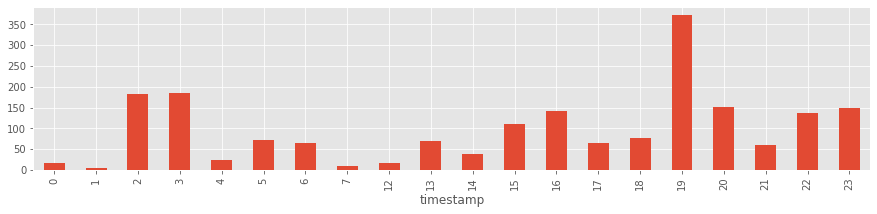

In [38]:
marketing = occupation_cnt_by_hour(ratings, "marketing")
assert type(marketing) == pd.Series

# 24h is in a day
assert len(marketing) < 25

###  Visualize the marketers and the programmers rating hours.

First the marketers:

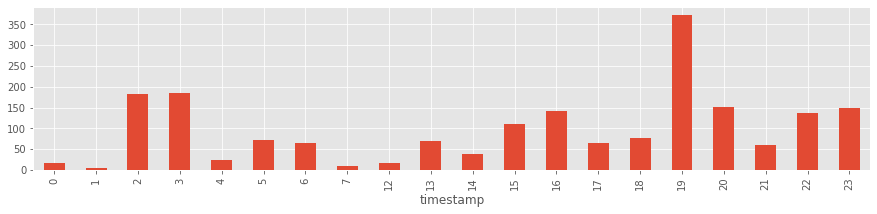

In [39]:
marketing = occupation_cnt_by_hour(ratings, "marketing")
#raise NotImplementedError()

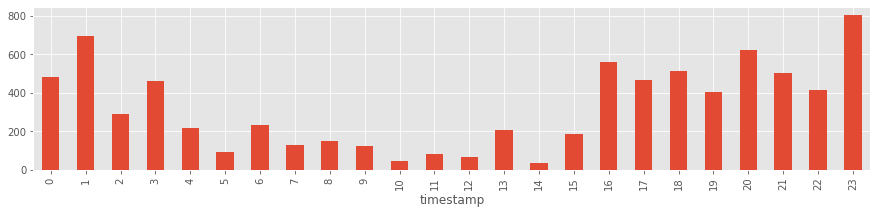

In [40]:
programmer = occupation_cnt_by_hour(ratings, "programmer")

In [41]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

# ===================== EXTRA LEVEL ======================

In [ ]:
ratings["timestamp"]
programmers=ratings[ratings.occupation=="programmer"]
programmers

In [ ]:
#return_value= df.groupby(df.release_date.dt.day)
#df.groupby(df.release_date.dt.day).size().plot(kind='pie')
programmers.groupby(programmers.timestamp.dt.hour).size().plot(kind='bar')